In [1]:
import pandas as pd

In [5]:
data = pd.read_csv('../../datasets/iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
data.rename(columns={'SepalLengthCm':'SL', 'SepalWidthCm':'SW','PetalLengthCm':'PL','PetalWidthCm':'PW'}, inplace=True)
data.head()

,Id,SL,SW,PL,PW,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
iris_setosa= data[data.Species=='Iris-setosa']
iris_versicolor= data[data.Species=='Iris-versicolor']
iris_virginica= data[data.Species=='Iris-virginica']

In [10]:
import numpy as np

In [11]:
# Mean
print(np.mean(iris_setosa.SW));
print(np.mean(iris_versicolor.SW));
print(np.mean(iris_virginica.SW));

3.418
2.7700000000000005
2.974


In [12]:
# Median
print(np.median(iris_setosa.SW));
print(np.median(iris_versicolor.SW));
print(np.median(iris_virginica.SW));


3.4
2.8
3.0


In [13]:
from scipy import stats

In [15]:
# Mode
print(stats.mode(iris_setosa.PL))
print(stats.mode(iris_versicolor.PL))
print(stats.mode(iris_virginica.PL))

[array([1.5]), array([14])]
ModeResult(mode=array([4.5]), count=array([7]))
ModeResult(mode=array([5.1]), count=array([7]))


In [17]:
# range
r = np.max(iris_setosa.PL) - np.min(iris_setosa.PL)
print('The range', r)

The range 0.8999999999999999


In [21]:
# percentiles
mylist = [1,2,3,4,5,6,7,8,9]
print(np.percentile(mylist, 25))
print(np.percentile(mylist, 90))

# setosa percentile 95
print(np.percentile(iris_setosa.PL, 95))

3.0
8.2
1.7


In [ ]:
# percentiles
mylist = [1,2,3,4,5,6,7,8,9]
print(np.percentiles(mylist, 15))

In [22]:
# quartiles
print(np.percentile(iris_setosa.PL, 25))
print(np.percentile(iris_setosa.PL, 50))
print(np.percentile(iris_setosa.PL, 75))
print(np.percentile(iris_setosa.PL, 100))

1.4
1.5
1.5750000000000002
1.9


In [25]:
# desvaición media absoluta
nums = [2, 5, 1, 6, 7 , 3, 11]
M = np.mean(nums)
print(M)

5.0


In [30]:
sum = 0
for i in range(len(nums)):
   dev = np.absolute(nums[i] - M)
   sum += round(dev,2)
   
print('Mean Absolute Deviation: ', sum/len(nums))

Mean Absolute Deviation:  2.5714285714285716


In [34]:
# caulculo de MAD con robust
from statsmodels import robust
mad = robust.mad(nums)
print(mad)

2.965204437011204


In [31]:
# Variance
np.var(iris_setosa.PL)

0.029504000000000002

In [32]:
# Desviación Estandar std
np.std(iris_setosa.PL)

0.17176728442867112

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\lgutierrez\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\lgutierrez\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\lgutierrez\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code

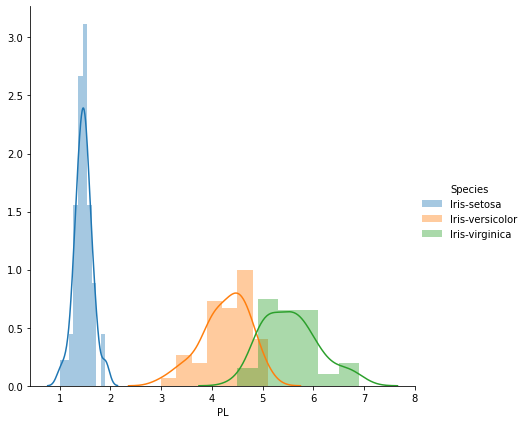

In [45]:
# Función de probabilidad de densidad PDF
sns.FacetGrid(data, hue='Species', height=6).map(sns.distplot,'PL').add_legend()
plt.show()

C:\Users\lgutierrez\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


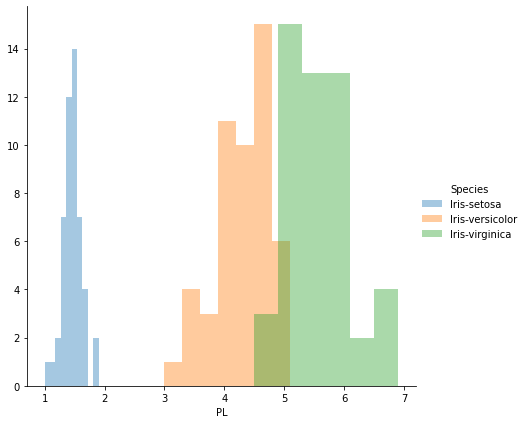

In [46]:
sns.FacetGrid(data, hue='Species', height=6).map(sns.distplot, 'PL', kde=False).add_legend()
plt.show()

In [53]:
# Función de distribution Acumuladad CDF
counts, bin_edges = np.histogram(iris_setosa.PL, bins=10)
pdf = counts / sum(counts)
cdf = np.cumsum(pdf)
print(pdf)
print(cdf)

TypeError: 'numpy.float64' object is not callable